In [1]:
import modelplotpy as mp

In [2]:
import io
import os
import requests
import zipfile
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
# we encountered that the source at uci.edu is not always available, therefore we made a copy to our repos.
r = requests.get('https://modelplot.github.io/img/bank-additional.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
# You can change the path, currently the data is written to the working directory
path = os.getcwd()
z.extractall(path)
bank = pd.read_csv(path + "/bank-additional/bank-additional-full.csv", sep = ';')

# select the 6 columns
bank = bank[['y', 'duration', 'campaign', 'pdays', 'previous', 'euribor3m']]
# rename target class value 'yes' for better interpretation
bank.y[bank.y == 'yes'] = 'term deposit'


In [3]:
# to create predictive models
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# define target vector y
y = bank.y
# define feature matrix X
X = bank.drop('y', axis = 1)

# Create the necessary datasets to build models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

# Instantiate a few classification models
clf_rf = RandomForestClassifier().fit(X_train, y_train)
clf_mult = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, y_train)

In [4]:
obj = mp.modelplotpy(feature_data = [X_train, X_test]
                     , label_data = [y_train, y_test]
                     , dataset_labels = ['train data', 'test data']
                     , models = [clf_rf, clf_mult]
                     , model_labels = ['random forest', 'multinomial logit']
                     , ntiles = 100
                     )

# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope 
ps = obj.plotting_scope(select_model_label = ['random forest'], select_dataset_label = ['test data'],scope='compare_models')

compare models
The label with smallest class is ['term deposit']


In [5]:
obj.ntiles

100

The response plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Response plot.png


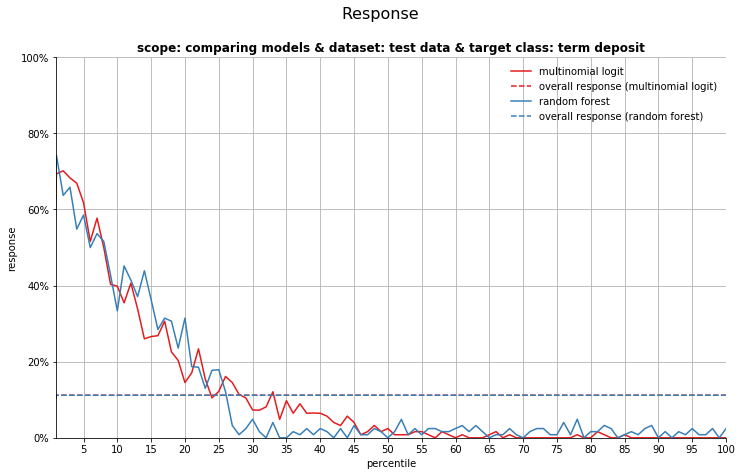

<Figure size 432x288 with 0 Axes>

In [6]:
# plot the cumulative gains plot
mp.plot_response(ps)

The cumulative response plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Cumulative response plot.png


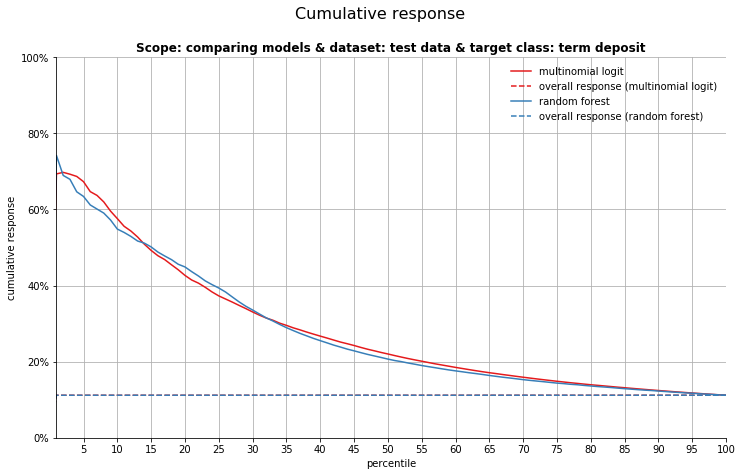

<Figure size 432x288 with 0 Axes>

In [7]:
mp.plot_cumresponse(ps)

The cumulative gains plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Cumulative gains plot.png


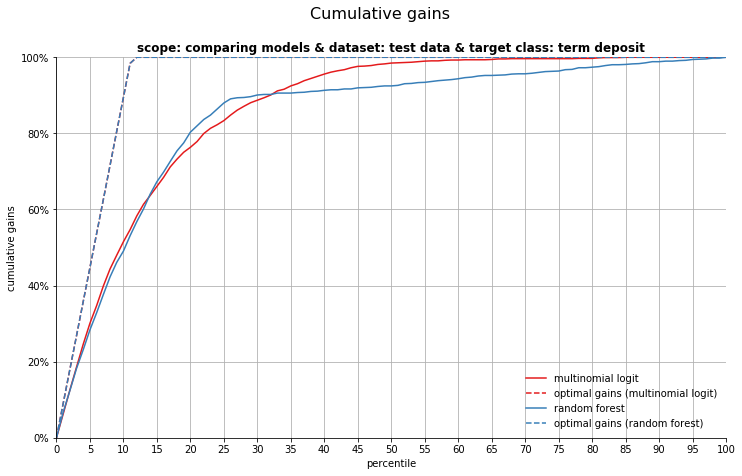

<Figure size 432x288 with 0 Axes>

In [8]:
mp.plot_cumgains(ps)

The cumulative lift plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Cumulative lift plot.png


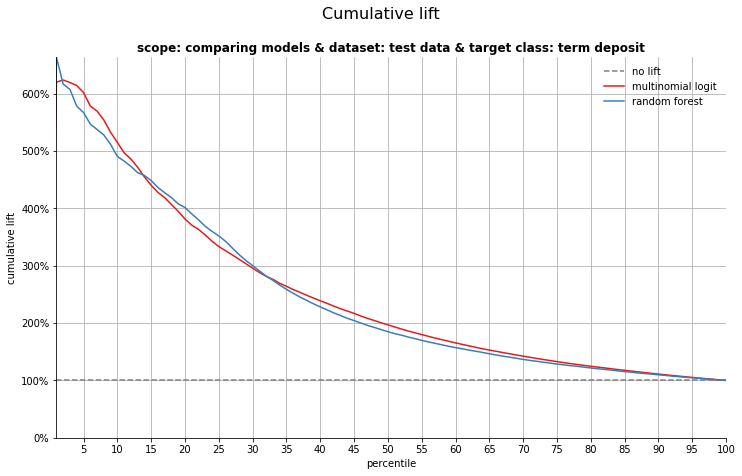

<Figure size 432x288 with 0 Axes>

In [9]:
mp.plot_cumlift(ps)

The plot all plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Plot all.png


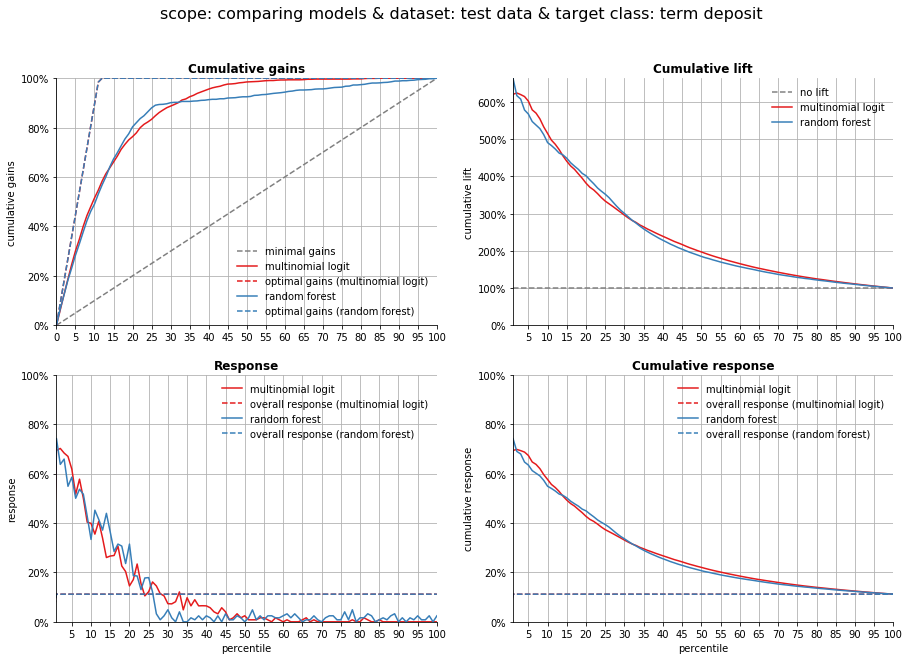

<Figure size 432x288 with 0 Axes>

In [10]:
mp.plot_all(ps)

The costs / revenues plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Costs Revenues plot.png


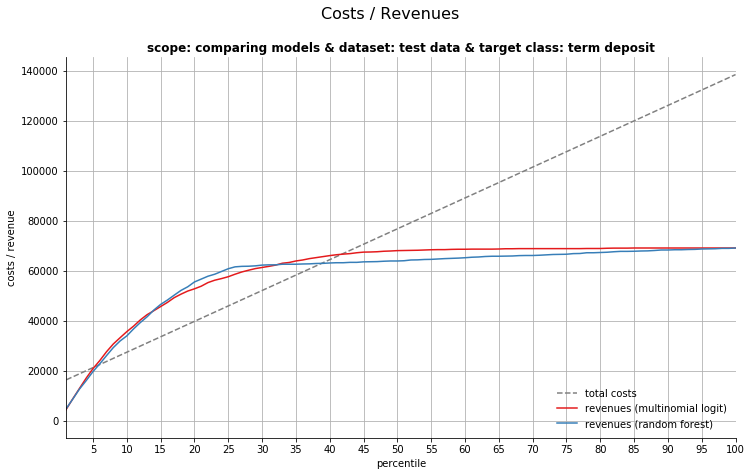

<Figure size 432x288 with 0 Axes>

In [11]:
mp.plot_costsrevs(ps,fixed_costs = 15000,variable_costs_per_unit = 10,profit_per_unit = 50)

The roi plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/ROI plot.png


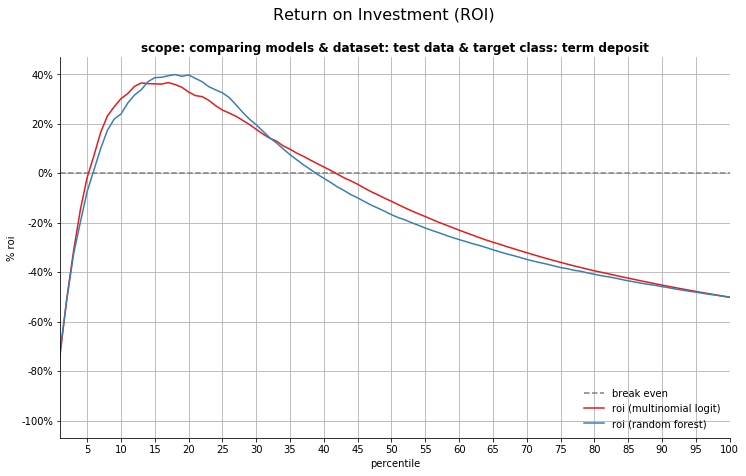

<Figure size 432x288 with 0 Axes>

In [12]:
mp.plot_roi(ps,fixed_costs = 15000,variable_costs_per_unit = 10,profit_per_unit = 50)

The profit plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/Profit plot.png


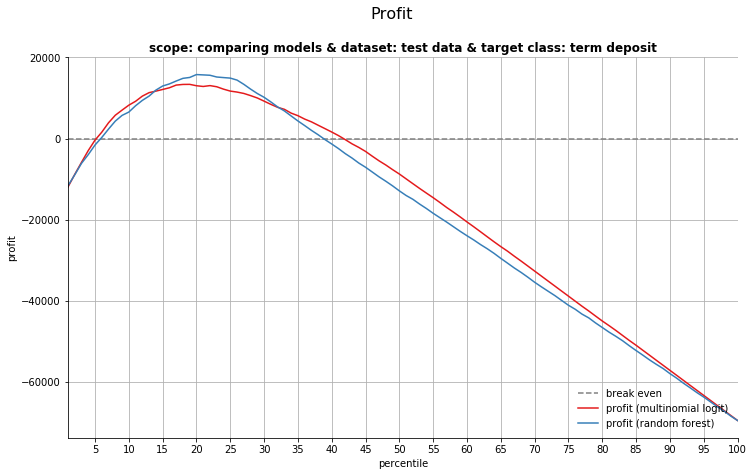

<Figure size 432x288 with 0 Axes>

In [13]:
mp.plot_profit(ps,fixed_costs = 15000,variable_costs_per_unit = 10,profit_per_unit = 50)

When we select percentile 1 until 20 from model multinomial logit in dataset test data the percentage of term deposit cases in the expected expected return on investment is 32%.
When we select percentile 1 until 20 from model random forest in dataset test data the percentage of term deposit cases in the expected expected return on investment is 39%.
The roi plot is saved in C:\Users\j.nagelkerke\PycharmProjects\modelplotpy/ROI plot.png


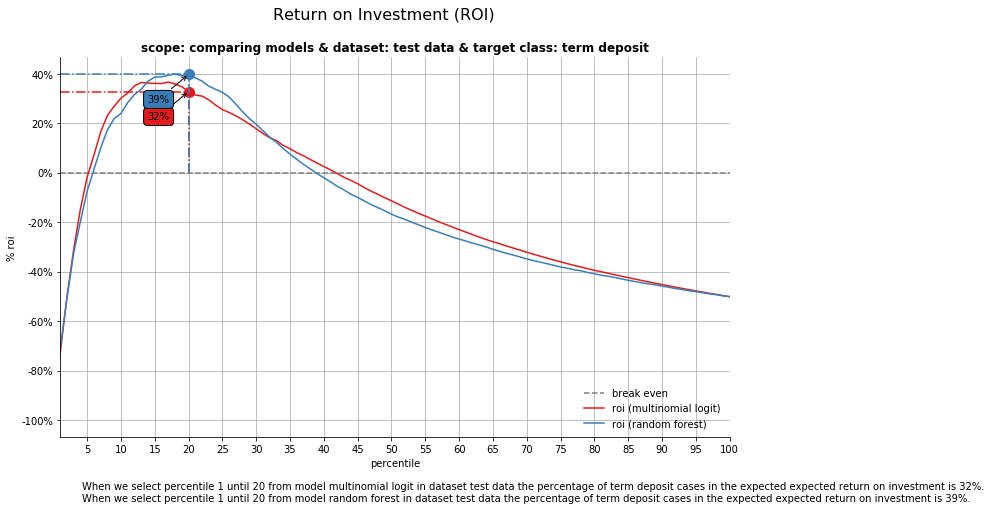

<Figure size 432x288 with 0 Axes>

In [14]:
mp.plot_roi(ps,fixed_costs = 15000,variable_costs_per_unit = 10,profit_per_unit = 50,highlight_ntile=20)